In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv("../Data/CSV/CSV-CJ01RLA 2024-05-11 14-51.CSV")

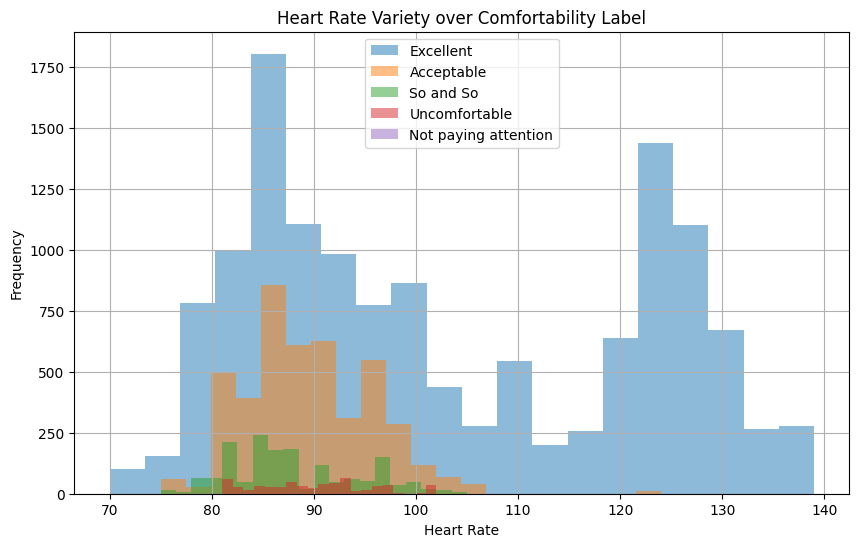

In [16]:
# HEART RATE VARIETY PLOT
heart_rate_df = df[['Heart Rate', 'ComfortabilityLabel']]

# Plot a histogram of the heart rate variability over the comfortability label
plt.figure(figsize=(10, 6))
for label in heart_rate_df['ComfortabilityLabel'].unique():
    label_data = heart_rate_df[heart_rate_df['ComfortabilityLabel'] == label]['Heart Rate']
    plt.hist(label_data, bins=20, alpha=0.5, label=label)

plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.title('Heart Rate Variety over Comfortability Label')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
# HEART RATE VS LATERAL ACCELERATION

# Filter the DataFrame to include only the relevant columns
filtered_df = df[['Lateral Acc. - Sensor (G200)', 'Heart Rate', 'ComfortabilityLabel']]

# Separate data based on comfortability labels
acceptable_data = filtered_df[filtered_df['ComfortabilityLabel'] == 'Acceptable']
excellent_data = filtered_df[filtered_df['ComfortabilityLabel'] == 'Excellent']
uncomfortable_data = filtered_df[filtered_df['ComfortabilityLabel'] == 'Uncomfortable']
so_and_so_data = filtered_df[filtered_df['ComfortabilityLabel'] == 'So and So']

# Plot a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(acceptable_data['Lateral Acc. - Sensor (G200)'], acceptable_data['Heart Rate'], color='blue', label='Acceptable')
plt.scatter(uncomfortable_data['Lateral Acc. - Sensor (G200)'], uncomfortable_data['Heart Rate'], color='red', label='Uncomfortable')
plt.scatter(excellent_data['Lateral Acc. - Sensor (G200)'], excellent_data['Heart Rate'], color='green', label='Excellent')
plt.scatter(so_and_so_data['Lateral Acc. - Sensor (G200)'], so_and_so_data['Heart Rate'], color='yellow', label='So and So')

# Add labels and title
plt.xlabel('Lateral Acceleration')
plt.ylabel('Heart Rate')
plt.title('Lateral Acceleration vs Heart Rate by Comfortability Label')
plt.legend()
plt.grid(True)
plt.show()

KeyError: "['Lateral Acc. - Sensor (G200)'] not in index"

In [ ]:
# HEART RATE VS COMFORTABILITY LABEL

# Filter the DataFrame to include only the relevant columns
filtered_df = df[['Lateral Acc. - Sensor (G200)', 'Heart Rate', 'ComfortabilityLabel']]

# Plot a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Heart Rate'], filtered_df['ComfortabilityLabel'])

# Add labels and title
plt.xlabel('Heart Rate')
plt.ylabel('ComfortabilityLabel')
plt.title('Lateral Acceleration vs Heart Rate by Comfortability Label')
plt.grid(True)
plt.show()


C:\Users\Armin\AppData\Local\Temp\ipykernel_18532\3123542592.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Heart Rate Variability'] = filtered_df['Heart Rate'].rolling(window=window_size).apply(lambda x: np.ptp(x), raw=True)


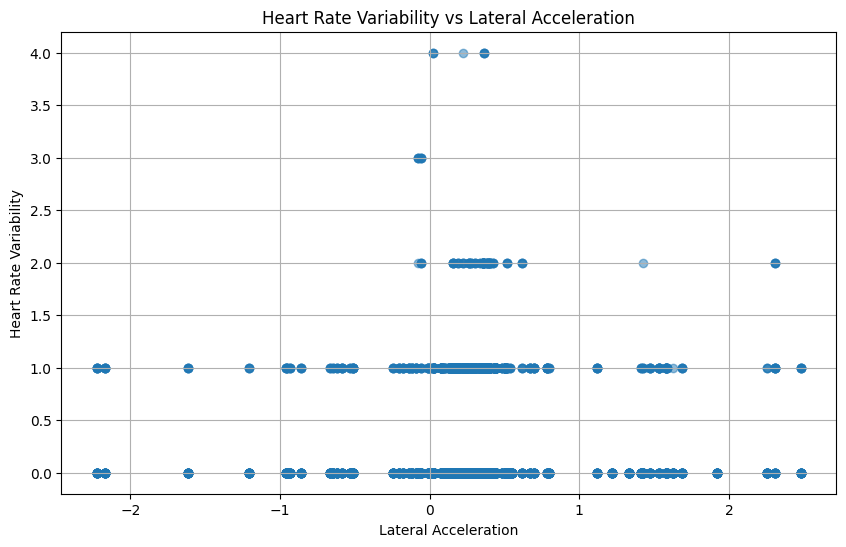

In [18]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filter the dataframe
start_time = pd.Timestamp("2024-05-11 14:55:00.000000")
end_time = pd.Timestamp("2024-05-11 15:05:13.898000")
filtered_df = df[(df['timestamp'] >= start_time) & (df['timestamp'] <= end_time)]

# Calculate heart rate variability over a window of 5 rows
window_size = 5
filtered_df['Heart Rate Variability'] = filtered_df['Heart Rate'].rolling(window=window_size).apply(lambda x: np.ptp(x), raw=True)

# Plot lateral acceleration against heart rate variability
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Slip control system sensor-Lateral acceleration sensor 1'], filtered_df['Heart Rate Variability'], alpha=0.5)
plt.xlabel('Lateral Acceleration')
plt.ylabel('Heart Rate Variability')
plt.title('Heart Rate Variability vs Lateral Acceleration')
plt.grid(True)
plt.show()


C:\Users\Armin\AppData\Local\Temp\ipykernel_18532\1104418181.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Heart Rate Variability'] = filtered_df['Heart Rate'].rolling(window=window_size).apply(lambda x: np.ptp(x), raw=True)


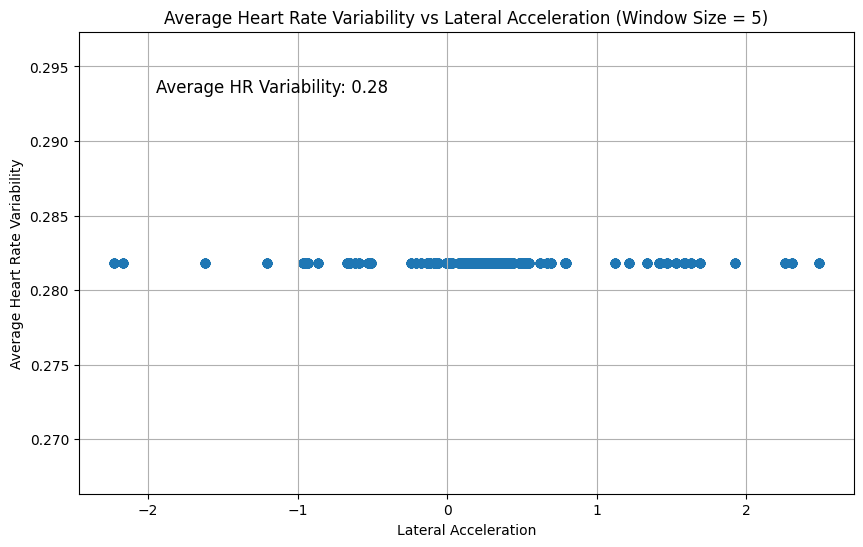

In [19]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filter the dataframe
start_time = pd.Timestamp("2024-05-11 14:55:00.000000")
end_time = pd.Timestamp("2024-05-11 15:05:13.898000")
filtered_df = df[(df['timestamp'] >= start_time) & (df['timestamp'] <= end_time)]

# Calculate heart rate variability over a window of 5 rows
#Calculate heart rate variability over a window of 5 rows
window_size = 5
filtered_df['Heart Rate Variability'] = filtered_df['Heart Rate'].rolling(window=window_size).apply(lambda x: np.ptp(x), raw=True)

# Calculate the average heart rate variability over the window size
average_hr_variability = filtered_df['Heart Rate Variability'].mean()

# Plot lateral acceleration against average heart rate variability
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Slip control system sensor-Lateral acceleration sensor 1'], [average_hr_variability] * len(filtered_df), alpha=0.5)
plt.xlabel('Lateral Acceleration')
plt.ylabel('Average Heart Rate Variability')
plt.title('Average Heart Rate Variability vs Lateral Acceleration (Window Size = 5)')
plt.grid(True)

# Add average heart rate variability as text annotation
plt.text(0.1, 0.9, f'Average HR Variability: {average_hr_variability:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()

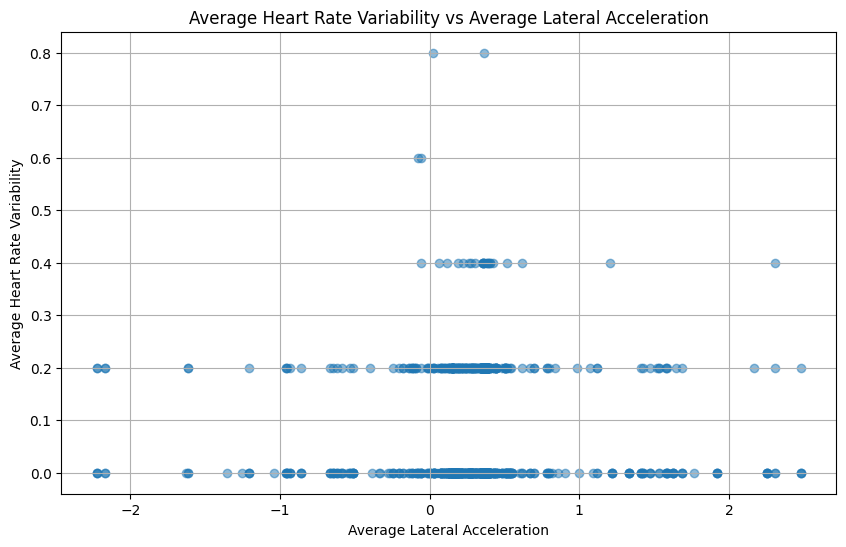

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined df and filtered_df

# Calculate heart rate variability and average lateral acceleration over a window of 5 rows
window_size = 5
average_hr_variability_list = []
average_lateral_acceleration_list = []

for i in range(0, len(filtered_df), window_size):
    if i + window_size >= len(filtered_df):
        break

    # Calculate average heart rate variability
    average_hr_variability = 0
    for j in range(window_size):
        average_hr_variability += abs(filtered_df['Heart Rate'].iloc[i + j] - filtered_df['Heart Rate'].iloc[i + j + 1])
    average_hr_variability_list.append(average_hr_variability / window_size)

    # Calculate average lateral acceleration
    average_lateral_acceleration = filtered_df['Slip control system sensor-Lateral acceleration sensor 1'].iloc[i:i+window_size].mean()
    average_lateral_acceleration_list.append(average_lateral_acceleration)

# Plot lateral acceleration against heart rate variability
plt.figure(figsize=(10, 6))
plt.scatter(average_lateral_acceleration_list, average_hr_variability_list, alpha=0.5)
plt.xlabel('Average Lateral Acceleration')
plt.ylabel('Average Heart Rate Variability')
plt.title('Average Heart Rate Variability vs Average Lateral Acceleration')
plt.grid(True)
plt.show()